# Penguin Classification with a Random Forest #
## Classifying the species of pengions using a ML model ##

In [4]:
!pip install scikit-learn seaborn

## Steps to train a machine learning model ##
1. Get data
2. Separate training and test data
3. Clean the data
4. Data exploration
5. Feature extraction
6. Choose and train a model
7. Optimize hyperparameters
8. Evaluate the model

## 1. Get data ##

In [89]:
import seaborn as sns

data = sns.load_dataset("penguins")
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


## 2. Separate training and test data ##

In [92]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size= 0.2, random_state=42)
train.shape, test.shape # number of rows and columns

((275, 7), (69, 7))

## 3. Clean the data ##

In [95]:
train = train.dropna() # remove rows with missing data
test = test.dropna()
train.isna().sum() # .plot.bar()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 4. Data exploration ##

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

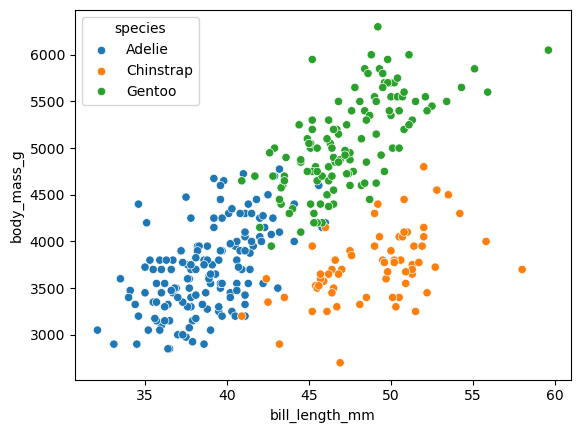

In [98]:
data.describe()
sns.scatterplot(data=data,x = "bill_length_mm", y = "body_mass_g", hue = "species")

## 5. Feature extraction ##

In [101]:
# define x and y
Xtrain = train[["bill_length_mm","body_mass_g"]]
Xtest = test[["bill_length_mm","body_mass_g"]]

ytrain = train["species"]
ytest = test["species"]

Xtrain.head(3)

,bill_length_mm,body_mass_g
66,35.5,3350.0
229,46.8,5150.0
7,39.2,4675.0


## 6. Choose and train a model ##

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model = DecisionTreeClassifier(max_depth = 4,random_state=7) # max_depth is how many questions the model can ask to classify
model = RandomForestClassifier(n_estimators = 100, max_depth = 4,random_state=7) # n_estimators is the number of trees
model.fit(Xtrain,ytrain)
round(model.score(Xtrain,ytrain),2) # accuracy

0.98

## 7. Optimize hyperparameters ##

In [107]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, Xtrain, ytrain, cv=5) # splits 5 times

array([0.90740741, 0.92592593, 0.96226415, 0.90566038, 0.98113208])

## 8. Evaluate the model (on test data) ##

In [119]:
(
    round(model.score(Xtrain,ytrain),2),
    round(model.score(Xtest,ytest),2)
)

(0.98, 0.92)